In [1]:
# Run this code cell to import relevant libraries
# Please update to seaborn v0.11 or above for this assignment
# check version: print(sns.__version__)

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
# Run but do not modify this code

insurance = pd.read_csv("insurance.csv")
print(insurance.shape)
insurance.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
charges_by_smoker = insurance.groupby('smoker')['charges'].mean().to_frame()
charges_by_smoker.head()

,charges
smoker,
no,8434.268298
yes,32050.231832


In [4]:
charges_by_sex = insurance.groupby('sex')['charges'].mean().to_frame()
charges_by_sex.head()

,charges
sex,
female,12569.578844
male,13956.751178


In [5]:
charges_by_region = insurance.groupby('region')['charges'].mean().to_frame()
charges_by_region.head()

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


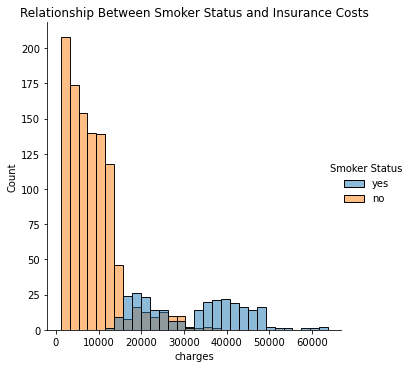

In [6]:
(sns.displot(data = insurance, x = 'charges', hue = 'smoker')
    .set(title = 'Relationship Between Smoker Status and Insurance Costs')
    ._legend.set_title('Smoker Status'))

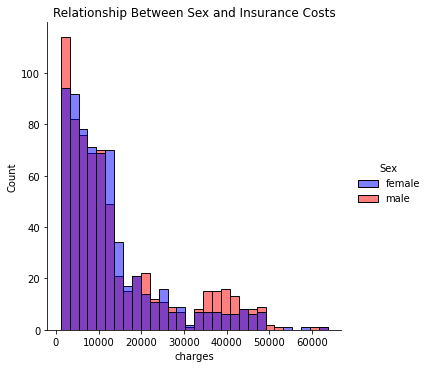

In [7]:
(sns.displot(data = insurance, x = 'charges', hue = 'sex', palette=["blue", "red"])
    .set(title = 'Relationship Between Sex and Insurance Costs')
    ._legend.set_title('Sex'))

In [18]:
males = insurance[insurance['sex'] == 'male']
females = insurance[insurance['sex'] == 'female']
male_prop = males['charges'].mean()
female_prop = females['charges'].mean()
male_std = males['charges'].std()
female_std = females['charges'].std()
p_val1 = stats.ttest_ind_from_stats(mean1=male_prop, std1=male_std, nobs1=males.shape[0], mean2=female_prop, std2=female_std, nobs2=females.shape[0])[1]
print("P-Value is : %5.3f" % (p_val1))
male_ci = list(stats.norm.interval(alpha=0.95, loc=male_prop, scale = (male_std / np.sqrt(1338))))
female_ci = list(stats.norm.interval(alpha=0.95, loc=female_prop, scale = (female_std / np.sqrt(1338))))
print("Male confidence interval ranges from %5.3f to %5.3f" % (male_ci[0], male_ci[1]))
print("Female confidence interval ranges from %5.3f to %5.3f" % (female_ci[0], female_ci[1]))

P-Value is : 0.036
Male confidence interval ranges from 13261.736 to 14651.766
Female confidence interval ranges from 11973.279 to 13165.879


In [19]:
smokers = insurance[insurance['smoker'] == 'yes']
nonsmokers = insurance[insurance['smoker'] == 'no']
smokers_prop = smokers['charges'].mean()
nonsmokers_prop = nonsmokers['charges'].mean()
smokers_std = smokers['charges'].std()
nonsmokers_std = nonsmokers['charges'].std()
p_val2 = stats.ttest_ind_from_stats(mean1=smokers_prop, std1=smokers_std, nobs1=smokers.shape[0], mean2=nonsmokers_prop, std2=nonsmokers_std, nobs2=nonsmokers.shape[0])[1]
print("P-Value is : %5.3f" % (p_val2))
smokers_ci = list(stats.norm.interval(alpha=0.95, loc=smokers_prop, scale = (smokers_std / np.sqrt(1338))))
nonsmokers_ci = list(stats.norm.interval(alpha=0.95, loc=nonsmokers_prop, scale = (nonsmokers_std / np.sqrt(1338))))
print("Smokers confidence interval ranges from %5.3f to %5.3f" % (smokers_ci[0], smokers_ci[1]))
print("Nonmokers confidence interval ranges from %5.3f to %5.3f" % (nonsmokers_ci[0], nonsmokers_ci[1]))

P-Value is : 0.000
Smokers confidence interval ranges from 31431.811 to 32668.653
Nonmokers confidence interval ranges from 8113.109 to 8755.428
